<a href="https://colab.research.google.com/github/xfil/IHMT-PythonCourse-2024/blob/main/ProjectoABTM_Python_2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Geographic distribution of *Aedes albopictus* in Italy between 2022 and 2024

---



Ana Balau and Tiago Melo

# **Introduction**

*   *Aedes albopictus* (Skuse, 1894) - vector and nuisance agent [1].
*   Transmitter of various viruses - dengue, chikungunya and Zika [2].


*   In the last 40 years - high invasive potencial and ecological plasticity [3, 4].
*   In Italy, the first record of *Ae. albopictus* occurred in 1991 - country where the Ae. albopictus reached its greatest European distribution [5].

*   In 2007 and 2017, chikungunya outbreaks associated with *Ae. albopictus* occurred [6].
*   In 2021, the Italian Ministry of Health issued the National Plan for Surveillance and Response to Arboviruses (PNA) transmitted by invasive mosquitoes (*Aedes spp.*) - increase in the number of *Ae. albopictus* records in the country [7].

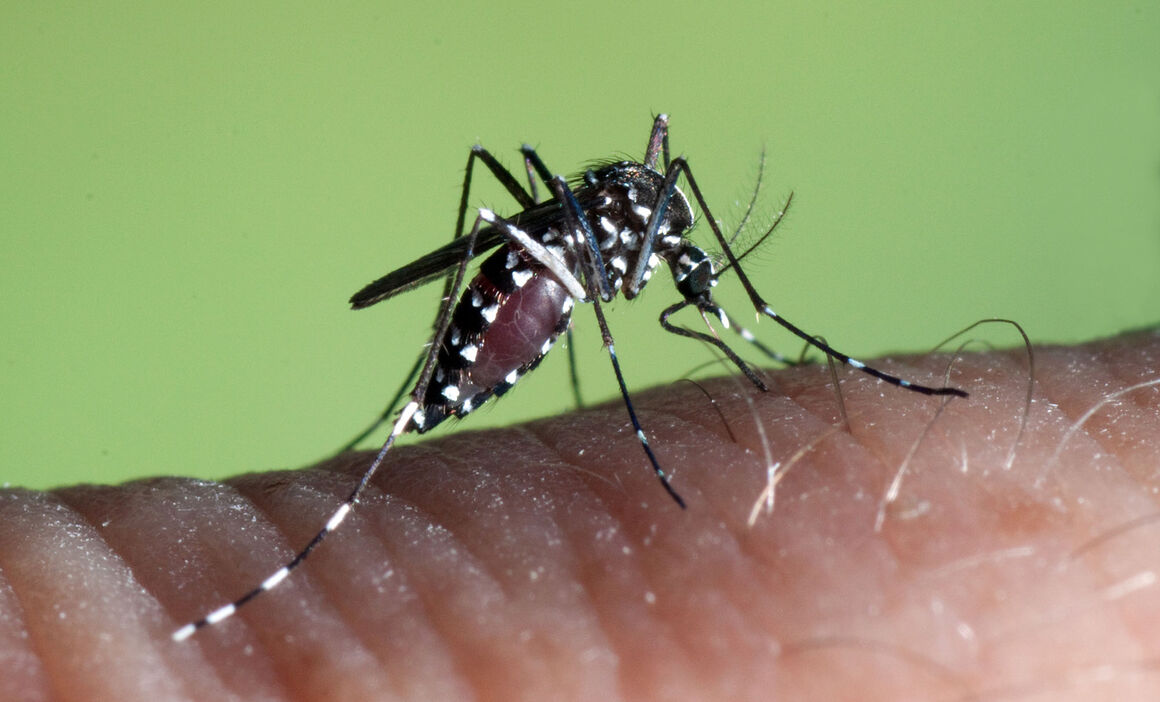

**Figure -** Mosquito *Aedes albopictus* is a vector of dengue, zika and chikungunya virus [8].

# **References**
**[1]** Capinera JL. Encyclopedia of Entomology. 2nd ed. Springer; 2008.

**[2]** Paupy C, Delatte H, Bagny L, Corbel V, Fontenille D. *Aedes albopictus*, an arbovirus vector: From the darkness to the light. Microbes Infect. 2009;11.

**[3]** Medlock JM, *et al*. An entomological review of invasive mosquitoes in Europe. Bull Entomol Res. 2015;105. doi:10.1017/S0007485315000103.

**[4]** Swan T, *et al*. A literature review of dispersal pathways of *Aedes* *albopictus* across different spatial scales: implications for vector surveillance. Parasites Vectors. 2022;15.

**[5]** Dalla Pozza G, Majori G. First record of Aedes albopictus establishment in Italy. J Am Mosq Control Assoc. 1992 Sep;8(3):318-20. PMID: 1402871.

**[6]** Rezza G. Chikungunya is back in Italy: 2007–2017. J Travel Med. 2018;25(1). doi:10.1093/jtm/tay004.

**[7]** Merakou C, Amendola A, Fortuna C, *et al*. Diagnosis of Imported Dengue and Zika Virus Infections in Italy from November 2015 to November 2022: Laboratory Surveillance Data from a National Reference Laboratory. Viruses. 2023;16(1):50. doi:10.3390/v16010050.

**[8]** European Centre for Disease Prevention and Control. *Aedes albopictus* - Factsheet for experts [internet]. 2023 [cited 2024 May 27]. Available from: https://www.ecdc.europa.eu/en/disease-vectors/facts/mosquito-factsheets/aedes-albopictus.

# **Main objectives**


*   Identify the number of *Aedes albopictus* records in Italy (Europe) between 2022 and 2024
*   Analyse the *Aedes albopictus* distribution in Italy


# **Specific objetives**


*   Create a distribution map of *Ae. albopictus* in Italy
*   Create count plots of distribution between 2022 and 2024, by italian cities, by occurrences and by spatial density






# **Workflow**


- Import libraries
- Choose *Aedes albopictus*
- Associate geografic locations to cities
- Obtain the number of registers
- Create the world map
- Add the *Ae. albopictus* occorrences
- Create a map with *Ae. albopictus* occurrences
- Create a heatmap
- Make a Scatter plot of distribution of *Ae. albopictus* in Italy
- Create a count plot per city
- Create a bar plot of occurrences of *Ae. albopictus* per year
- Make a pie chart of occurrences of *Ae. albopictus* between 2022 and 2024
- Create a spatial density plot of distribution of *Ae. albopictus* in Italy


# **Python code**

In [1]:
!pip install pygbif

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.3/64.3 kB 1.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.4/61.4 kB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 5.5 MB/s eta 0:00:00


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
from pygbif import species as species
from pygbif import occurrences as occ
import pygbif
pygbif.caching(True)
import pandas as pd

In [4]:
splist = ['Aedes albopictus']
keys = [species.name_backbone(x)['usageKey'] for x in splist]
keys

[1651430]

In [5]:
out = [occ.search(taxonKey = x, limit=0)['count'] for x in keys]
out

[114091]

In [6]:
# Make a dict of species names and number of records, sorting in descending order
x = dict(zip(splist, out))
print(x)
print(x.items())
sorted(x.items(), key=lambda z:z[1], reverse=False)

{'Aedes albopictus': 114091}
dict_items([('Aedes albopictus', 114091)])


[('Aedes albopictus', 114091)]

In [7]:
outEUR = [occ.search(continent='europe', taxonKey = x, limit=0)['count'] for x in keys]
outEUR

[21489]

In [8]:
# Search in a specific country
outIT = [occ.search(country='IT', taxonKey = x, limit=0)['count'] for x in keys]
outIT

[4286]

In [9]:
# Get data from GBIF
outIT = [occ.search(taxonKey = 1651430, hasCoordinate=True, limit=0)['count']]
outIT

[107443]

In [10]:
# Get and process your own dataset for your species of interest
Aalbopictus = occ.search(country='IT', taxonKey=1651430, hasCoordinate=True, limit=1000)

In [11]:
Aalbopictus

{'offset': 0,
 'limit': 300,
 'endOfRecords': False,
 'count': 4204,
 'results': [{'key': 4855507052,
   'datasetKey': '50c9509d-22c7-4a22-a47d-8c48425ef4a7',
   'publishingOrgKey': '28eb1a3f-1c15-4a95-931a-4af90ecb574d',
   'installationKey': '997448a8-f762-11e1-a439-00145eb45e9a',
   'hostingOrganizationKey': '28eb1a3f-1c15-4a95-931a-4af90ecb574d',
   'publishingCountry': 'US',
   'protocol': 'DWC_ARCHIVE',
   'lastCrawled': '2024-05-27T08:55:37.327+00:00',
   'lastParsed': '2024-05-28T03:42:53.619+00:00',
   'crawlId': 461,
   'extensions': {},
   'basisOfRecord': 'HUMAN_OBSERVATION',
   'occurrenceStatus': 'PRESENT',
   'taxonKey': 1651430,
   'kingdomKey': 1,
   'phylumKey': 54,
   'classKey': 216,
   'orderKey': 811,
   'familyKey': 3346,
   'genusKey': 7924646,
   'speciesKey': 1651430,
   'acceptedTaxonKey': 1651430,
   'scientificName': 'Aedes albopictus (Skuse, 1894)',
   'acceptedScientificName': 'Aedes albopictus (Skuse, 1894)',
   'kingdom': 'Animalia',
   'phylum': 'Arthr

In [12]:
Aalbopictusdf = pd.DataFrame.from_dict(Aalbopictus['results'])
Aalbopictusdf.head(5)

,key,datasetKey,publishingOrgKey,installationKey,hostingOrganizationKey,publishingCountry,protocol,lastCrawled,lastParsed,crawlId,...,projectId,datasetID,samplingProtocol,informationWithheld,dynamicProperties,language,type,locationAccordingTo,locationRemarks,accessRights
0,4855507052,50c9509d-22c7-4a22-a47d-8c48425ef4a7,28eb1a3f-1c15-4a95-931a-4af90ecb574d,997448a8-f762-11e1-a439-00145eb45e9a,28eb1a3f-1c15-4a95-931a-4af90ecb574d,US,DWC_ARCHIVE,2024-05-27T08:55:37.327+00:00,2024-05-28T03:42:53.619+00:00,461,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4855270390,50c9509d-22c7-4a22-a47d-8c48425ef4a7,28eb1a3f-1c15-4a95-931a-4af90ecb574d,997448a8-f762-11e1-a439-00145eb45e9a,28eb1a3f-1c15-4a95-931a-4af90ecb574d,US,DWC_ARCHIVE,2024-05-27T08:55:37.327+00:00,2024-05-28T04:12:10.059+00:00,461,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4103067125,50c9509d-22c7-4a22-a47d-8c48425ef4a7,28eb1a3f-1c15-4a95-931a-4af90ecb574d,997448a8-f762-11e1-a439-00145eb45e9a,28eb1a3f-1c15-4a95-931a-4af90ecb574d,US,DWC_ARCHIVE,2024-05-27T08:55:37.327+00:00,2024-05-28T04:00:30.346+00:00,461,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4111568195,50c9509d-22c7-4a22-a47d-8c48425ef4a7,28eb1a3f-1c15-4a95-931a-4af90ecb574d,997448a8-f762-11e1-a439-00145eb45e9a,28eb1a3f-1c15-4a95-931a-4af90ecb574d,US,DWC_ARCHIVE,2024-05-27T08:55:37.327+00:00,2024-05-28T04:01:39.252+00:00,461,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4121297831,50c9509d-22c7-4a22-a47d-8c48425ef4a7,28eb1a3f-1c15-4a95-931a-4af90ecb574d,997448a8-f762-11e1-a439-00145eb45e9a,28eb1a3f-1c15-4a95-931a-4af90ecb574d,US,DWC_ARCHIVE,2024-05-27T08:55:37.327+00:00,2024-05-28T03:33:22.050+00:00,461,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
# List columns
listCols = ['acceptedScientificName', 'acceptedTaxonKey', 'basisOfRecord', 'continent', 'country', 'day', 'decimalLatitude', 'decimalLongitude', 'eventDate', 'eventTime', 'family', 'gadm', 'genus', 'genusKey', 'geodeticDatum', 'species', 'year', 'month']

In [14]:
# Sorted columns by alphabetic name
Aalbopictusdf = Aalbopictusdf[sorted(listCols)]
Aalbopictusdf.head(5)

,acceptedScientificName,acceptedTaxonKey,basisOfRecord,continent,country,day,decimalLatitude,decimalLongitude,eventDate,eventTime,family,gadm,genus,genusKey,geodeticDatum,month,species,year
0,"Aedes albopictus (Skuse, 1894)",1651430,HUMAN_OBSERVATION,EUROPE,Italy,26,38.208939,15.255649,2024-04-26T12:45:46,12:45:46+02:00,Culicidae,{},Aedes,7924646,WGS84,4,Aedes albopictus,2024
1,"Aedes albopictus (Skuse, 1894)",1651430,HUMAN_OBSERVATION,EUROPE,Italy,29,38.193644,15.240638,2024-04-29T17:04,17:04:00+02:00,Culicidae,"{'level0': {'gid': 'ITA', 'name': 'Italy'}, 'l...",Aedes,7924646,WGS84,4,Aedes albopictus,2024
2,"Aedes albopictus (Skuse, 1894)",1651430,HUMAN_OBSERVATION,EUROPE,Italy,28,41.850782,12.431051,2023-04-28T19:35:09,19:35:09+02:00,Culicidae,"{'level0': {'gid': 'ITA', 'name': 'Italy'}, 'l...",Aedes,7924646,WGS84,4,Aedes albopictus,2023
3,"Aedes albopictus (Skuse, 1894)",1651430,HUMAN_OBSERVATION,EUROPE,Italy,4,43.764121,11.247093,2023-05-04T16:40:07,16:40:07+02:00,Culicidae,"{'level0': {'gid': 'ITA', 'name': 'Italy'}, 'l...",Aedes,7924646,WGS84,5,Aedes albopictus,2023
4,"Aedes albopictus (Skuse, 1894)",1651430,HUMAN_OBSERVATION,EUROPE,Italy,17,45.138203,10.436313,2023-05-17T16:13:37,16:13:37+02:00,Culicidae,"{'level0': {'gid': 'ITA', 'name': 'Italy'}, 'l...",Aedes,7924646,WGS84,5,Aedes albopictus,2023


In [15]:
# Add city
import pandas as pd
import io
from geopy.geocoders import Nominatim
from importlib.metadata import version

In [16]:
import subprocess
import sys

reqs = subprocess.check_output([sys.executable, '-m', 'pip', 'freeze'])
installed_packages = [r.decode().split('==')[0] for r in reqs.split()]
print("geopy.geocoders" in installed_packages)

False


In [17]:
%pip install geopy

In [18]:
def city_state_country(row):
    coord = f"{row['decimalLatitude']}, {row['decimalLongitude']}"
    location = geolocator.reverse(coord, exactly_one=True)
    address = location.raw['address']
    city = address.get('city', '')
    row['city'] = city
    return row

In [19]:
geolocator = Nominatim(user_agent="you_app_user")

# location = geolocator.reverse("52.509669, 13.376294")
# print(location.address)

# Aalbopictusdf_mini = Aalbopictusdf.head(10).copy()
#print(Aalbopictusdf_mini)

Aalbopictusdf = Aalbopictusdf.apply(city_state_country, axis=1)
print(Aalbopictusdf.head(20))

            acceptedScientificName  acceptedTaxonKey      basisOfRecord  \
0   Aedes albopictus (Skuse, 1894)           1651430  HUMAN_OBSERVATION   
1   Aedes albopictus (Skuse, 1894)           1651430  HUMAN_OBSERVATION   
2   Aedes albopictus (Skuse, 1894)           1651430  HUMAN_OBSERVATION   
3   Aedes albopictus (Skuse, 1894)           1651430  HUMAN_OBSERVATION   
4   Aedes albopictus (Skuse, 1894)           1651430  HUMAN_OBSERVATION   
5   Aedes albopictus (Skuse, 1894)           1651430  HUMAN_OBSERVATION   
6   Aedes albopictus (Skuse, 1894)           1651430  HUMAN_OBSERVATION   
7   Aedes albopictus (Skuse, 1894)           1651430  HUMAN_OBSERVATION   
8   Aedes albopictus (Skuse, 1894)           1651430  HUMAN_OBSERVATION   
9   Aedes albopictus (Skuse, 1894)           1651430  HUMAN_OBSERVATION   
10  Aedes albopictus (Skuse, 1894)           1651430  HUMAN_OBSERVATION   
11  Aedes albopictus (Skuse, 1894)           1651430  HUMAN_OBSERVATION   
12  Aedes albopictus (Sku

In [20]:
# Obtain the number of registries.
Aalbopictusdf['species'].value_counts()

species
Aedes albopictus    300
Name: count, dtype: int64

In [21]:
# Obtain null data in this dataset.
Aalbopictusdf.isnull().sum()

acceptedScientificName    0
acceptedTaxonKey          0
basisOfRecord             0
continent                 0
country                   0
day                       0
decimalLatitude           0
decimalLongitude          0
eventDate                 0
eventTime                 3
family                    0
gadm                      0
genus                     0
genusKey                  0
geodeticDatum             0
month                     0
species                   0
year                      0
city                      0
dtype: int64

In [22]:
!pip install geopandas folium

In [23]:
import math
import folium
from folium import Choropleth, Circle, Marker
from folium.plugins import HeatMap, MarkerCluster

In [24]:
# create simple map with folium map
# tiles options in: https://github.com/python-visualization/folium/tree/main/folium/templates/tiles
m_1 = folium.Map(location=[41.9027835, 12.4963655], tiles='openstreetmap', zoom_start=6)

#display the map
m_1

In [25]:
#create the map
f = folium.Figure(width=1000, height=500)
m_2 = folium.Map(location=[41.9027835, 12.4963655], tiles='openstreetmap', zoom_start=5).add_to(f)

# add points to the map
for idx, row in Aalbopictusdf.iterrows():
  Marker([row['decimalLatitude'], row['decimalLongitude']],popup=Aalbopictusdf.iloc[idx]['species']).add_to(m_2)

#display the map
m_2

In [26]:
# Create the map
f = folium.Figure(width=1000, height=500)
m_3 = folium.Map(location=[41.9027835, 12.4963655], tiles='cartodbpositron', zoom_start=5).add_to(f)

# add points to the map
mc = MarkerCluster()
for idx, row in Aalbopictusdf.iterrows():
    if not math.isnan(row['decimalLongitude']) and not math.isnan(row['decimalLatitude']):
        mc.add_child(Marker([row['decimalLatitude'], row['decimalLongitude']]))
m_3.add_child(mc)

# Display the map
m_3

In [27]:
# Create a base map
m_4 = folium.Map(location=[41.9027835, 12.4963655], tiles='cartodbpositron', zoom_start=6)

# Add a heatmap to the base map
HeatMap(data=Aalbopictusdf[['decimalLatitude', 'decimalLongitude']], radius=15).add_to(m_4)

# Display the map
m_4

<ipython-input-28-92374667b355>:6: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


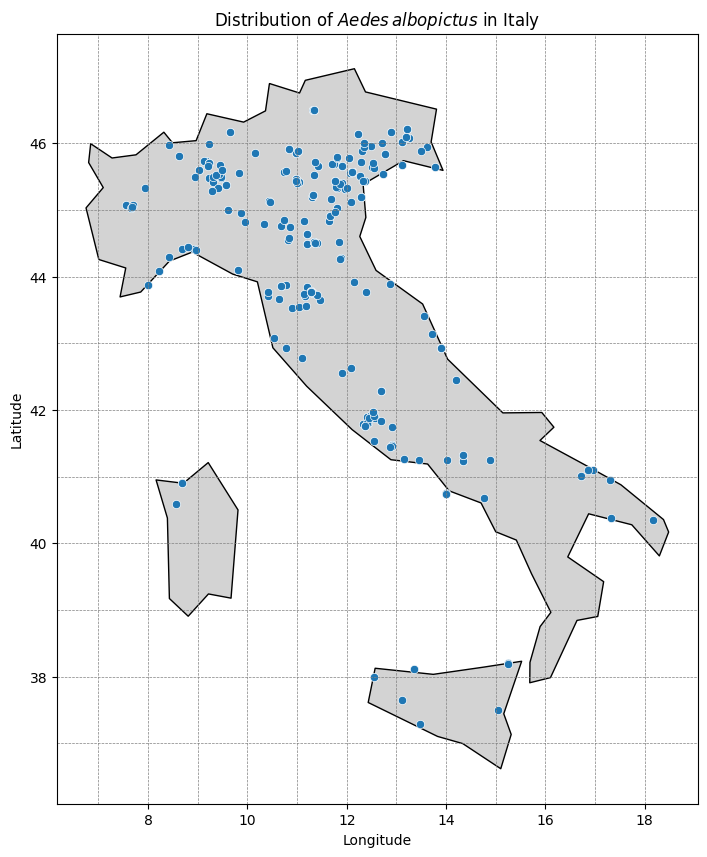

In [28]:
import geopandas as gpd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the shapefile of Italy
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
italy = world[world.name == "Italy"]

# Create a GeoDataFrame from the Aalbopictusdf DataFrame
geometry = gpd.points_from_xy(Aalbopictusdf['decimalLongitude'], Aalbopictusdf['decimalLatitude'])
geo_df = gpd.GeoDataFrame(Aalbopictusdf, geometry=geometry)

# Plot the map of Italy and the scatter plot
fig, ax = plt.subplots(figsize=(10, 10))

# Plot the shaded map of Italy
italy.plot(ax=ax, color='lightgrey', edgecolor='black')

# Overlay the scatter plot
sns.scatterplot(x='decimalLongitude', y='decimalLatitude', data=Aalbopictusdf, ax=ax)

# Add title and labels
plt.title('Distribution of $Aedes \, albopictus$ in Italy')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Define the interval for the lines
lon_interval = 1  # Interval for longitude lines
lat_interval = 1  # Interval for latitude lines

# Get the bounds of the plot
min_lon, max_lon = Aalbopictusdf['decimalLongitude'].min(), Aalbopictusdf['decimalLongitude'].max()
min_lat, max_lat = Aalbopictusdf['decimalLatitude'].min(), Aalbopictusdf['decimalLatitude'].max()

# Add longitude lines
for lon in range(int(min_lon), int(max_lon) + 1, lon_interval):
    plt.axvline(x=lon, color='grey', linestyle='--', linewidth=0.5)

# Add latitude lines
for lat in range(int(min_lat), int(max_lat) + 1, lat_interval):
    plt.axhline(y=lat, color='grey', linestyle='--', linewidth=0.5)

# Display the plot
plt.show()

<ipython-input-29-d5e33bfb5978>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='city', data=filtered_df, palette='hsv')


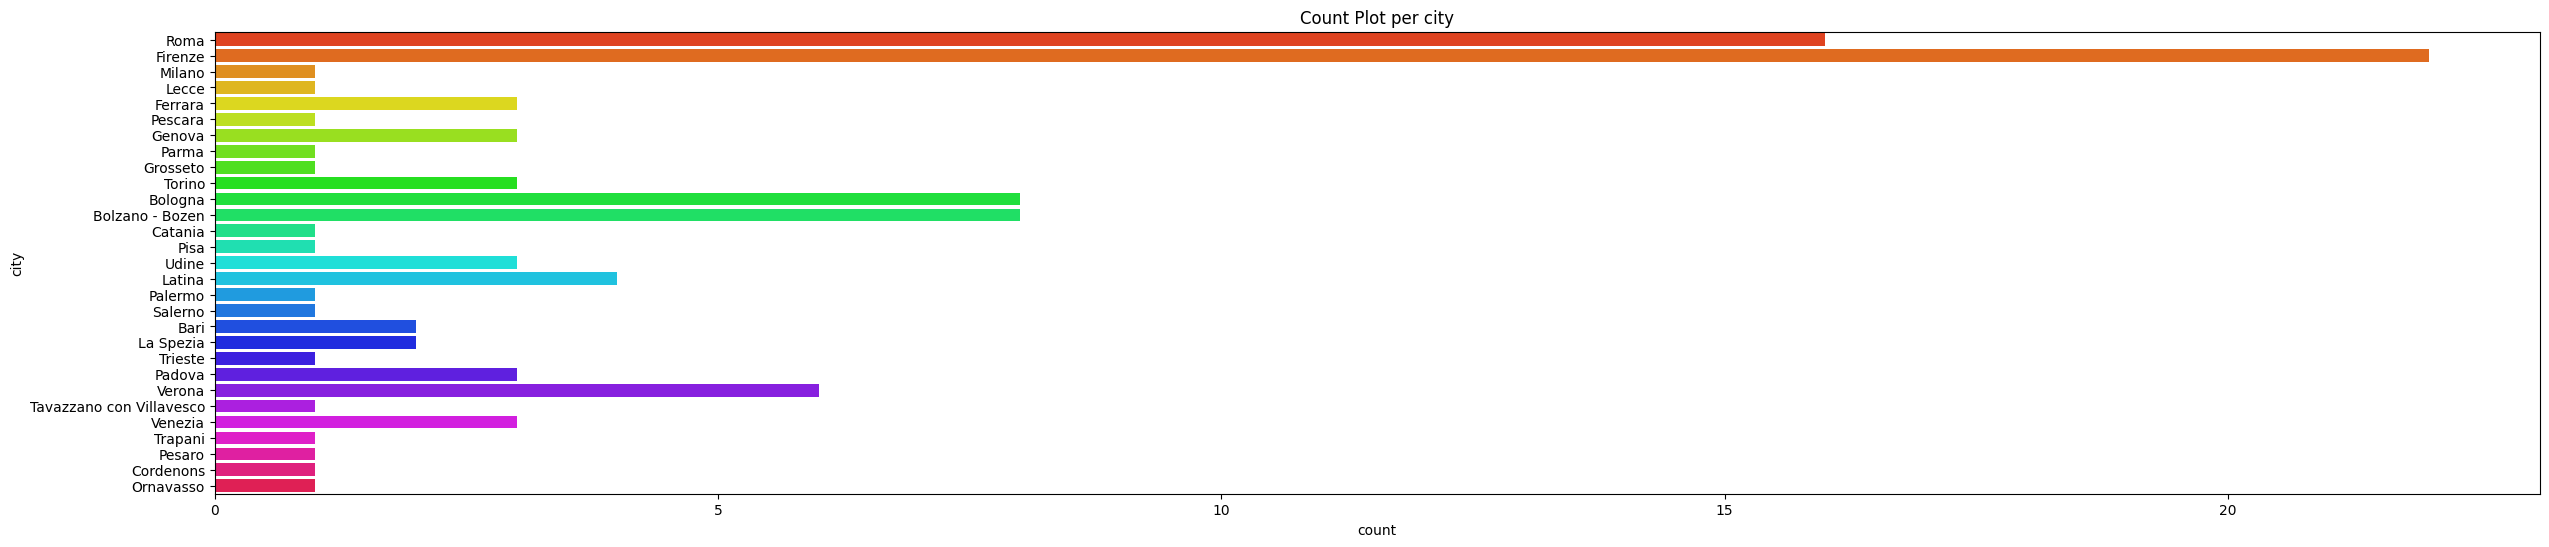

In [29]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming Aalbopictusdf is the DataFrame you are working with
# Filter the DataFrame to include only rows with non-blank geographical coordinates
filtered_df = Aalbopictusdf.dropna(subset=['decimalLatitude', 'decimalLongitude'])

# Remove any rows where 'city' is blank or unexpected
filtered_df = filtered_df[filtered_df['city'].notna() & (filtered_df['city'] != '')]

# Create a count plot with each bar having a different color
plt.figure(figsize=(30, 6))
sns.countplot(y='city', data=filtered_df, palette='hsv')

# Add title and display the plot
plt.title('Count Plot per city')
plt.show()

<ipython-input-30-3b1c5895b2d0>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=occurrences_per_year.index, y=occurrences_per_year.values, palette=colors)


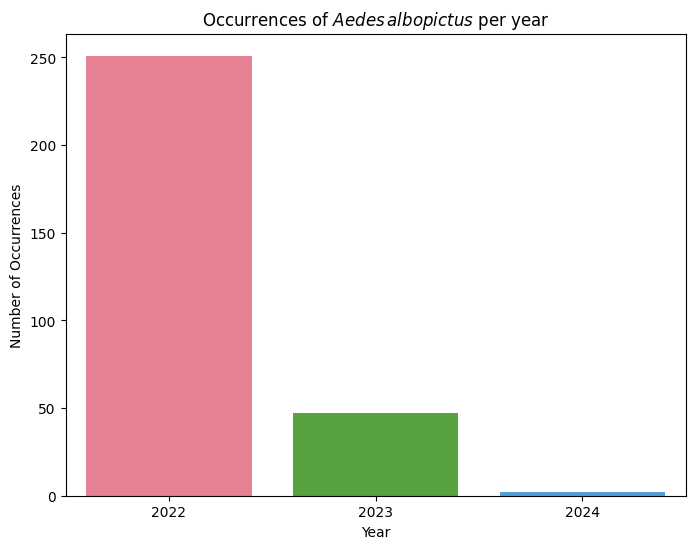

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count the number of occurrences per year
occurrences_per_year = Aalbopictusdf['year'].value_counts().sort_index()

# Set the desired figure size
plt.figure(figsize=(8, 6))

# Create a bar plot with each bar having a different color
colors = sns.color_palette('husl', len(occurrences_per_year))
sns.barplot(x=occurrences_per_year.index, y=occurrences_per_year.values, palette=colors)

# Add labels and title
plt.title('Occurrences of $Aedes \, albopictus$ per year')
plt.xlabel('Year')
plt.ylabel('Number of Occurrences')

# Display the plot
plt.show()

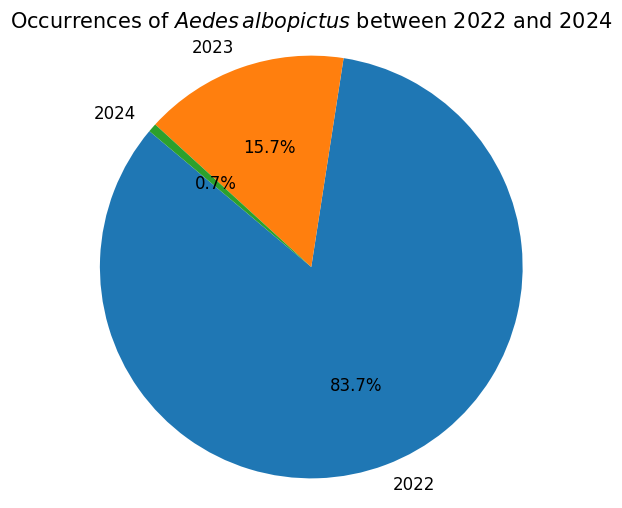

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count the number of occurrences per year
occurrences_per_year = Aalbopictusdf['year'].value_counts().sort_index()

# Set the desired figure size
plt.figure(figsize=(6, 6))

# Create a pie chart
plt.pie(occurrences_per_year.values, labels=occurrences_per_year.index, autopct='%1.1f%%', startangle=140, textprops={'fontsize': 12})

# Add a title
plt.title('Occurrences of $Aedes \, albopictus$ between 2022 and 2024', fontsize=15)

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')
# Display the plot
plt.show()

<ipython-input-32-9ba625c21f56>:2: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
<ipython-input-32-9ba625c21f56>:13: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x=Aalbopictusdf['decimalLongitude'], y=Aalbopictusdf['decimalLatitude'], cmap='Reds', shade=True, cbar=True, ax=ax)


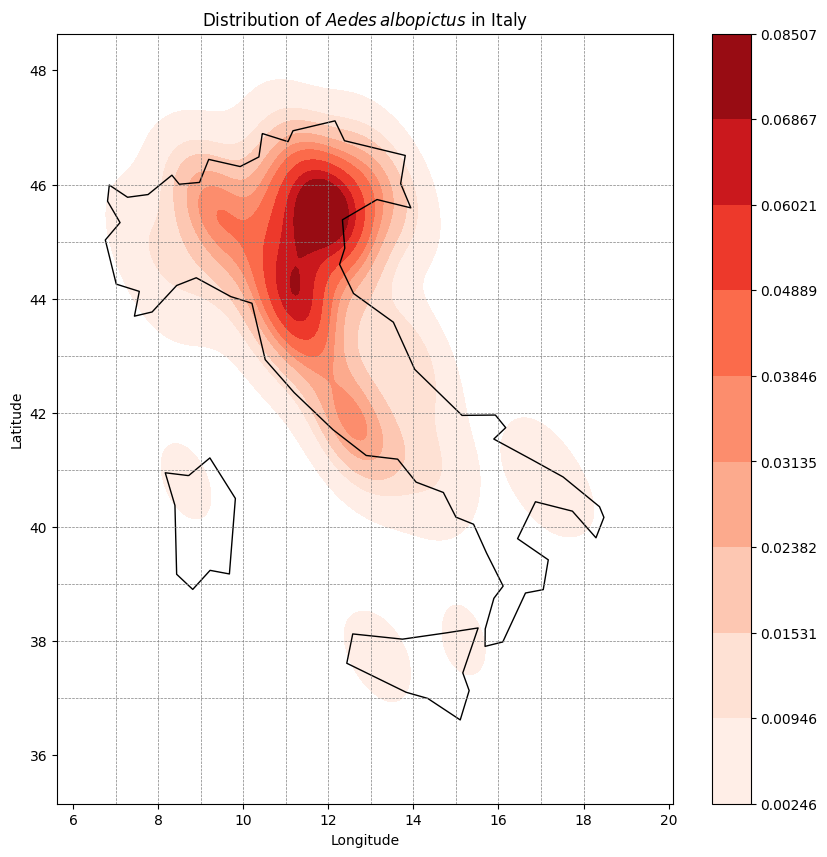

In [32]:
# Load the shapefile of Italy
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
italy = world[world.name == "Italy"]

# Create a GeoDataFrame from the Aalbopictusdf DataFrame
geometry = gpd.points_from_xy(Aalbopictusdf['decimalLongitude'], Aalbopictusdf['decimalLatitude'])
geo_df = gpd.GeoDataFrame(Aalbopictusdf, geometry=geometry)

# Plot the map of Italy and the KDE plot
fig, ax = plt.subplots(figsize=(10, 10))

# KDE plot for spacial density
sns.kdeplot(x=Aalbopictusdf['decimalLongitude'], y=Aalbopictusdf['decimalLatitude'], cmap='Reds', shade=True, cbar=True, ax=ax)

# Plot Italy boundary
italy.boundary.plot(ax=ax, color='black', linewidth=1)

# Add title and labels
plt.title('Distribution of $Aedes \, albopictus$ in Italy')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Define interval for longitude and latitude lines
lon_interval = 1  # Interval for longitude lines
lat_interval = 1  # Interval for latitude lines

# Graphic limits
min_lon, max_lon = Aalbopictusdf['decimalLongitude'].min(), Aalbopictusdf['decimalLongitude'].max()
min_lat, max_lat = Aalbopictusdf['decimalLatitude'].min(), Aalbopictusdf['decimalLatitude'].max()

# Add longitude lines
for lon in range(int(min_lon), int(max_lon) + 1, lon_interval):
    plt.axvline(x=lon, color='grey', linestyle='--', linewidth=0.5)

# Add latitude lines
for lat in range(int(min_lat), int(max_lat) + 1, lat_interval):
    plt.axhline(y=lat, color='grey', linestyle='--', linewidth=0.5)

# Print the graphic
plt.show()